In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from matplotlib import pyplot as plt

In [2]:
def calMetric(yTrue,yPred,i):
    '''
    Mean Absolute Percentage Error.
    '''
    mape = 0
    for j in range(len(yTrue)):
        mape += (abs(yTrue[j]-yPred[j])/yTrue[j])
    mape = (mape*1.0/len(yTrue))*100    

    print ("\n")
    print (outputdf.columns[i])
    print ("R2 : ",r2_score(yTrue,yPred))
    print ("MAE : ",mean_absolute_error(yTrue,yPred))
    print ("RMSE : ",np.sqrt(mean_squared_error(yTrue,yPred)))
    print ("MAPE : ",mape)
    print ("----------------------------------------------------------")
    return  [r2_score(yTrue,yPred), mean_absolute_error(yTrue,yPred), np.sqrt(mean_squared_error(yTrue,yPred)),mape]

In [100]:
inputdf = pd.read_csv("inputdf.csv")
inputdf['TransI_dtmDateTime'] = pd.to_datetime(inputdf['TransI_dtmDateTime'])
#To maintain relation between the date and the sale values.
inputdf['TransI_dtmDateTime'] = inputdf.iloc[:,0] + pd.Timedelta(1,unit='D')
outputdf = pd.read_csv("outputdf.csv")
ind = list(outputdf[( outputdf["ES_POPCORN SMALL"] <= 600 ) & ( outputdf["ES_POPCORN SMALL"] >80 )].index )
inputdf = inputdf.loc[ind]
inputdf.reset_index(drop=True,inplace=True)
outputdf = outputdf.loc[ind]
outputdf.reset_index(drop=True,inplace=True)
print ( inputdf.shape , outputdf.shape )

(877, 488) (877, 14)


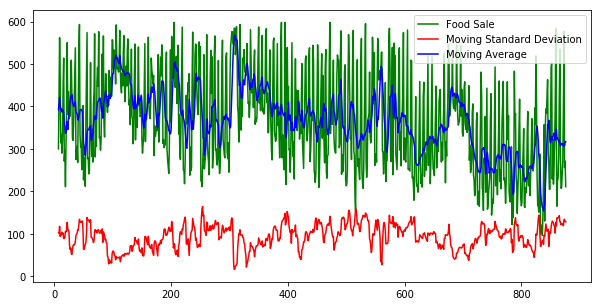

In [121]:
plt.figure(figsize=(10,5))
plt.plot (outputdf.iloc[7:,0] ,"green")
plt.plot (outputdf.rolling(window=7).std().iloc[7:,0] , "red")
plt.plot (outputdf.rolling(window=7).mean().iloc[7:,0] , "blue")
plt.legend(["Food Sale","Moving Standard Deviation","Moving Average"])
plt.show()

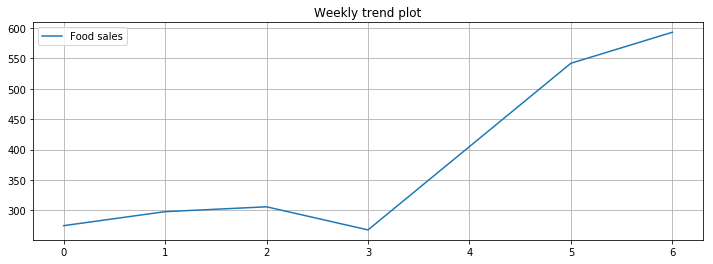

In [92]:
plt.figure(figsize=(12,4))
plt.grid(True)
plt.title("Weekly trend plot")
plt.plot(outputdf[["ES_POPCORN SMALL"]].iloc[42:49,0].reset_index(drop=True), label='Food sales')
plt.legend()
plt.show()

In [35]:
dictionary = {}
for i in range(0,1):
    dictionary[outputdf.columns[i]] = []
    
    print ("Food : ",outputdf.columns[i])
    #req_indices = list(inputdf[inputdf["Holiday/Not Holiday of tomorrow"]==1].index)
    holidays = inputdf[["TransI_dtmDateTime","Holiday/Not Holiday of tomorrow"]]
    #holidays = holidays.loc[req_indices]
    holidays.columns = ["ds","holiday"]
    prophet_input = pd.concat([inputdf['TransI_dtmDateTime'],outputdf.iloc[:,i]],axis=1)
    prophet_input.columns = ["ds","y"]
    
    index = prophet_input[prophet_input["ds"]<str("2017-01-01")].index[-1]
    prophet_input.drop(list(prophet_input[prophet_input["y"]>=800].index),axis=0,inplace=True)
    
    #holidays["holiday"] = str(holidays["holiday"])
    model = Prophet(changepoint_prior_scale=0.01)
    model.fit(prophet_input.iloc[:index+1,:])
    forecast = model.predict(pd.DataFrame(prophet_input.iloc[index+1:,0]))
    print ("Metrics : ")
    results = calMetric(np.array(prophet_input.iloc[index+1:,1]),np.array(forecast["yhat"]),i)
    print ("----------------------------------------------------------------------")

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Food :  ES_POPCORN SMALL


/opt/anaconda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/opt/anaconda/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/opt/anaconda/lib/python3.6/site-packages/fbprophet/forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


Metrics : 


ES_POPCORN SMALL
R2 :  -0.3764632682953495
MAE :  114.54394241852548
RMSE :  131.7915670563344
MAPE :  46.62433978760264
----------------------------------------------------------
----------------------------------------------------------------------


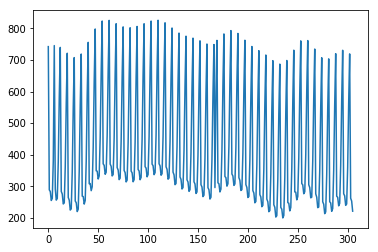

In [49]:
plt.plot(forecast["yhat"] + forecast["weekly"])

In [62]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2017-01-15,416.284034,461.793375,680.191302,416.284034,416.284034,153.838493,153.838493,153.838493,153.838493,153.838493,153.838493,172.291115,172.291115,172.291115,-18.452622,-18.452622,-18.452622,570.122527
1,2017-01-16,416.261538,244.994193,447.543513,416.261538,416.261538,-72.995213,-72.995213,-72.995213,-72.995213,-72.995213,-72.995213,-54.938404,-54.938404,-54.938404,-18.056809,-18.056809,-18.056809,343.266325
2,2017-01-17,416.239041,232.513237,453.126926,416.239041,416.239041,-75.417744,-75.417744,-75.417744,-75.417744,-75.417744,-75.417744,-57.886620,-57.886620,-57.886620,-17.531124,-17.531124,-17.531124,340.821297
3,2017-01-18,416.216545,220.512398,439.217065,416.216545,416.216545,-89.276465,-89.276465,-89.276465,-89.276465,-89.276465,-89.276465,-72.342939,-72.342939,-72.342939,-16.933526,-16.933526,-16.933526,326.940080
4,2017-01-19,416.194048,220.062060,433.700632,416.194048,416.194143,-85.632527,-85.632527,-85.632527,-85.632527,-85.632527,-85.632527,-69.308386,-69.308386,-69.308386,-16.324141,-16.324141,-16.324141,330.561521
5,2017-01-20,416.171551,278.094497,502.397160,416.171551,416.172045,-25.949756,-25.949756,-25.949756,-25.949756,-25.949756,-25.949756,-10.186448,-10.186448,-10.186448,-15.763308,-15.763308,-15.763308,390.221795
6,2017-01-22,416.126558,462.792023,685.877760,416.126544,416.127838,157.273022,157.273022,157.273022,157.273022,157.273022,157.273022,172.291115,172.291115,172.291115,-15.018094,-15.018094,-15.018094,573.399580
7,2017-01-23,416.104062,243.615167,457.473523,416.103757,416.105863,-69.876675,-69.876675,-69.876675,-69.876675,-69.876675,-69.876675,-54.938404,-54.938404,-54.938404,-14.938271,-14.938271,-14.938271,346.227386
8,2017-01-25,416.059069,218.600015,438.407075,416.057906,416.062372,-87.918521,-87.918521,-87.918521,-87.918521,-87.918521,-87.918521,-72.342939,-72.342939,-72.342939,-15.575582,-15.575582,-15.575582,328.140548
9,2017-01-26,416.036572,223.804848,440.695442,416.035018,416.040446,-85.659755,-85.659755,-85.659755,-85.659755,-85.659755,-85.659755,-69.308386,-69.308386,-69.308386,-16.351369,-16.351369,-16.351369,330.376817


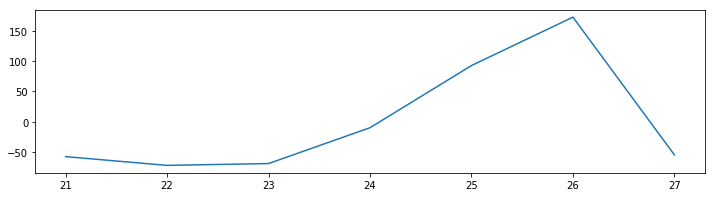

In [68]:
plt.figure(figsize=(12,3))
plt.plot(forecast[["weekly"]].iloc[21:28,0])

/opt/anaconda/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()


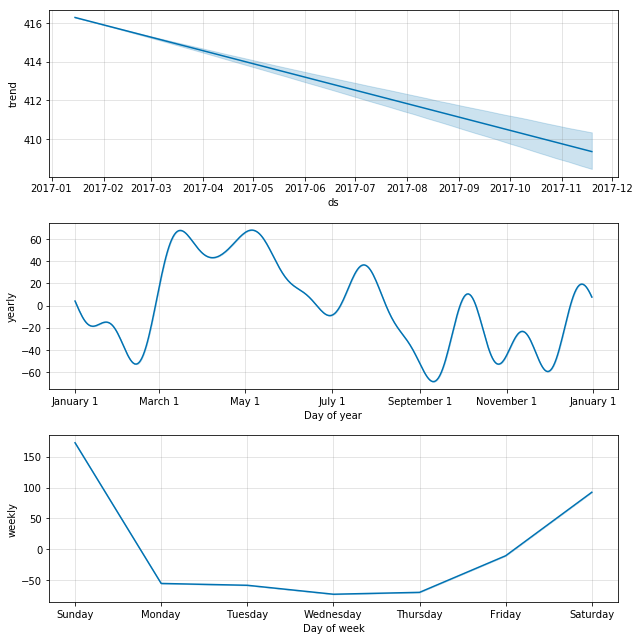

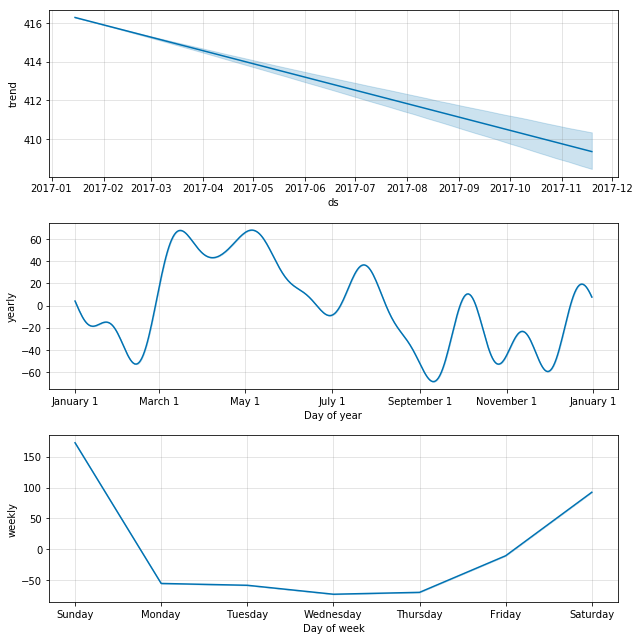

In [44]:
model.plot_components(forecast[forecast[["ds","weekly"]].weekly > 0])

In [131]:
cnames = {
'aliceblue':            '#F0F8FF',
'antiquewhite':         '#FAEBD7',
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'azure':                '#F0FFFF',
'beige':                '#F5F5DC',
'bisque':               '#FFE4C4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'cornflowerblue':       '#6495ED',
'cornsilk':             '#FFF8DC',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'goldenrod':            '#DAA520',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'lavender':             '#E6E6FA',
'lavenderblush':        '#FFF0F5',
'lawngreen':            '#7CFC00',
'lemonchiffon':         '#FFFACD',
'lightblue':            '#ADD8E6',
'lightcoral':           '#F08080',
'lightcyan':            '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen':           '#90EE90',
'lightgray':            '#D3D3D3',
'lightpink':            '#FFB6C1',
'lightsalmon':          '#FFA07A',
'lightseagreen':        '#20B2AA',
'lightskyblue':         '#87CEFA',
'lightslategray':       '#778899',
'lightsteelblue':       '#B0C4DE',
'lightyellow':          '#FFFFE0',
'lime':                 '#00FF00',
'limegreen':            '#32CD32',
'linen':                '#FAF0E6',
'magenta':              '#FF00FF',
'maroon':               '#800000',
'mediumaquamarine':     '#66CDAA',
'mediumblue':           '#0000CD',
'mediumorchid':         '#BA55D3',
'mediumpurple':         '#9370DB',
'mediumseagreen':       '#3CB371',
'mediumslateblue':      '#7B68EE',
'mediumspringgreen':    '#00FA9A',
'mediumturquoise':      '#48D1CC',
'mediumvioletred':      '#C71585',
'midnightblue':         '#191970',
'mintcream':            '#F5FFFA',
'mistyrose':            '#FFE4E1',
'moccasin':             '#FFE4B5',
'navajowhite':          '#FFDEAD',
'navy':                 '#000080',
'oldlace':              '#FDF5E6',
'olive':                '#808000',
'olivedrab':            '#6B8E23',
'orange':               '#FFA500',
'orangered':            '#FF4500',
'orchid':               '#DA70D6',
'palegoldenrod':        '#EEE8AA',
'palegreen':            '#98FB98',
'paleturquoise':        '#AFEEEE',
'palevioletred':        '#DB7093',
'papayawhip':           '#FFEFD5',
'peachpuff':            '#FFDAB9',
'peru':                 '#CD853F',
'pink':                 '#FFC0CB',
'plum':                 '#DDA0DD',
'powderblue':           '#B0E0E6',
'purple':               '#800080',
'red':                  '#FF0000',
'rosybrown':            '#BC8F8F',
'royalblue':            '#4169E1',
'saddlebrown':          '#8B4513',
'salmon':               '#FA8072',
'sandybrown':           '#FAA460',
'seagreen':             '#2E8B57',
'seashell':             '#FFF5EE',
'sienna':               '#A0522D',
'silver':               '#C0C0C0',
'skyblue':              '#87CEEB',
'slateblue':            '#6A5ACD',
'slategray':            '#708090',
'snow':                 '#FFFAFA',
'springgreen':          '#00FF7F',
'steelblue':            '#4682B4',
'tan':                  '#D2B48C',
'teal':                 '#008080',
'thistle':              '#D8BFD8',
'tomato':               '#FF6347',
'turquoise':            '#40E0D0',
'violet':               '#EE82EE',
'wheat':                '#F5DEB3',
'white':                '#FFFFFF',
'whitesmoke':           '#F5F5F5',
'yellow':               '#FFFF00',
'yellowgreen':          '#9ACD32'}

In [134]:
list(cnames.keys())

['indigo',
 'gold',
 'hotpink',
 'firebrick',
 'indianred',
 'yellow',
 'mistyrose',
 'darkolivegreen',
 'olive',
 'darkseagreen',
 'pink',
 'tomato',
 'lightcoral',
 'orangered',
 'navajowhite',
 'lime',
 'palegreen',
 'greenyellow',
 'burlywood',
 'seashell',
 'mediumspringgreen',
 'fuchsia',
 'papayawhip',
 'blanchedalmond',
 'chartreuse',
 'dimgray',
 'black',
 'peachpuff',
 'springgreen',
 'aquamarine',
 'white',
 'orange',
 'lightsalmon',
 'darkslategray',
 'brown',
 'ivory',
 'dodgerblue',
 'peru',
 'lawngreen',
 'chocolate',
 'crimson',
 'forestgreen',
 'slateblue',
 'lightseagreen',
 'cyan',
 'mintcream',
 'silver',
 'antiquewhite',
 'mediumorchid',
 'skyblue',
 'gray',
 'darkturquoise',
 'goldenrod',
 'darkgreen',
 'floralwhite',
 'darkviolet',
 'darkgray',
 'moccasin',
 'saddlebrown',
 'darkslateblue',
 'lightskyblue',
 'lightpink',
 'mediumvioletred',
 'red',
 'deeppink',
 'limegreen',
 'darkmagenta',
 'palegoldenrod',
 'plum',
 'turquoise',
 'lightgoldenrodyellow',
 'darkg

In [143]:
model.changepoints

94    2015-04-15
188   2015-07-18
282   2016-01-07
376   2016-04-24
470   2016-07-28
564   2016-10-30
658   2017-02-09
752   2017-05-14
Name: ds, dtype: datetime64[ns]

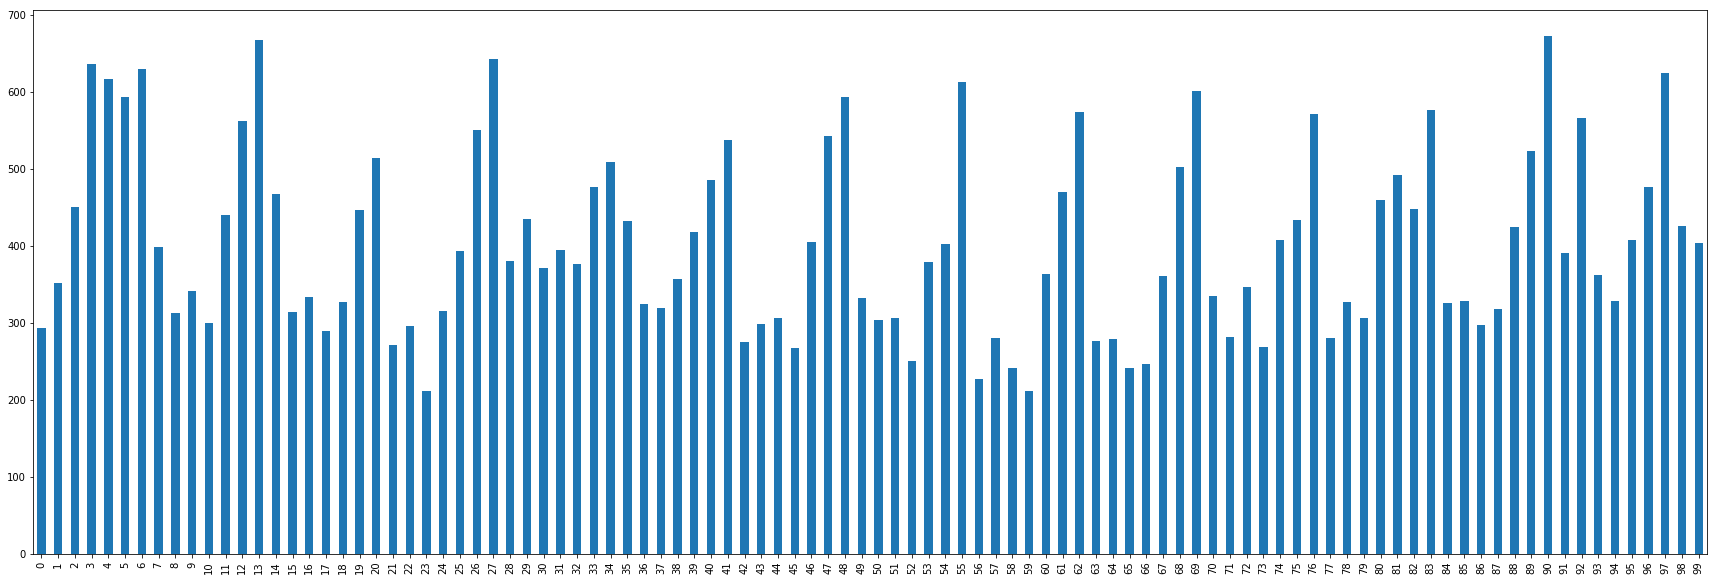

In [159]:
plt.figure(figsize=(30,10))
prophet_input.iloc[:100,-1].plot(kind='bar')
plt.show()

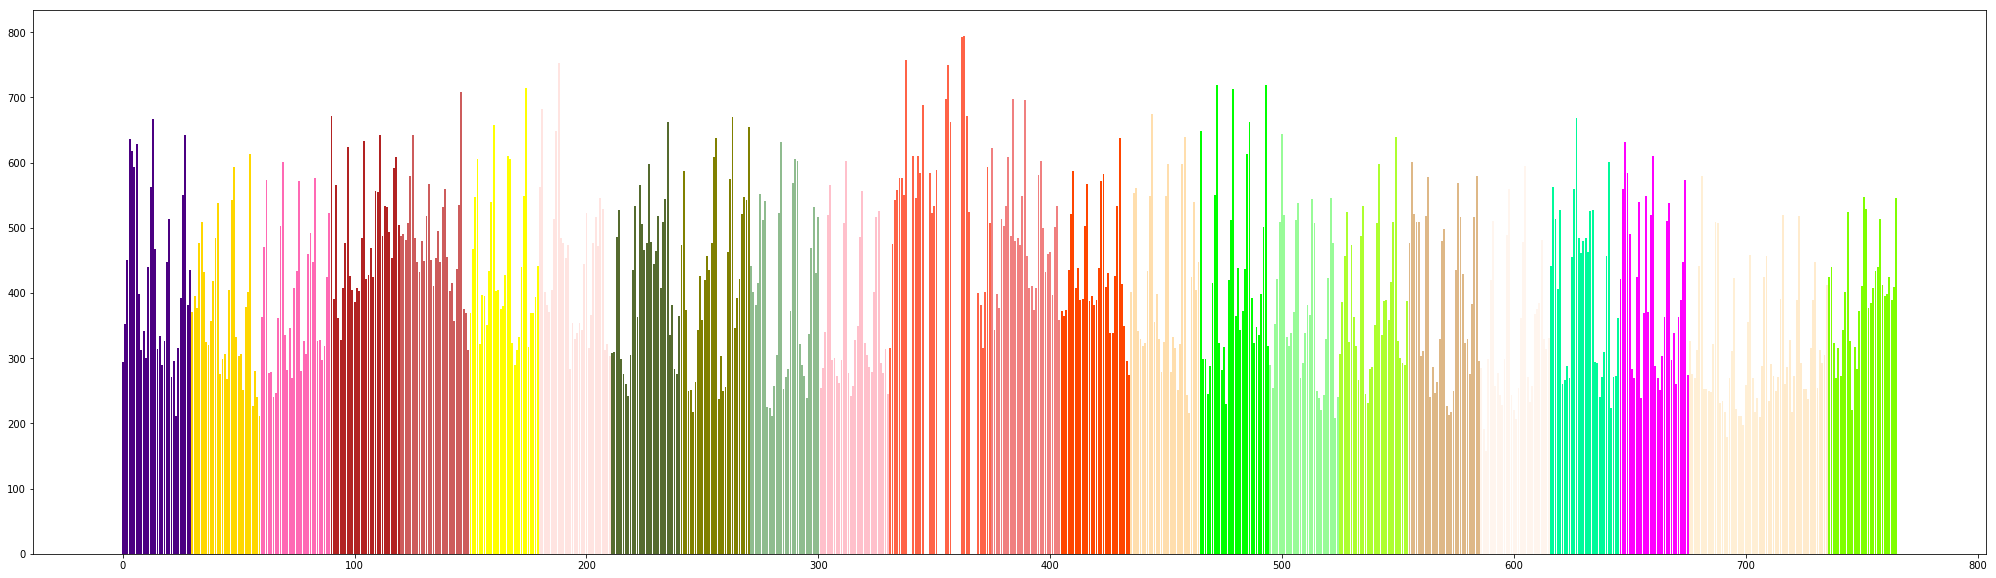

In [189]:
ind = list(model.changepoints.index)
col = ['b','g','r','c','m','y','b','g','c','m']

plt.figure(figsize=(35,10))
prev = 0
for i in range(25):
    #plt.scatter(prophet_input.iloc[prev:ind[i],-1].index,prophet_input.iloc[prev:ind[i],-1],color=cnames[list(cnames.keys())[i]])
    plt.bar(prophet_input.iloc[prev:ind[i],-1].index,prophet_input.iloc[prev:ind[i],-1],color=cnames[list(cnames.keys())[i]],align='center')
    prev = ind[i]
plt.show()

In [175]:
prophet_input.iloc[prev:ind[i],-1].shape

(94,)

In [ ]:
prophet_input.plot(kind='bar',color=cnames[list(cnames.keys())[i]])

In [141]:
forecast.shape

(940, 19)

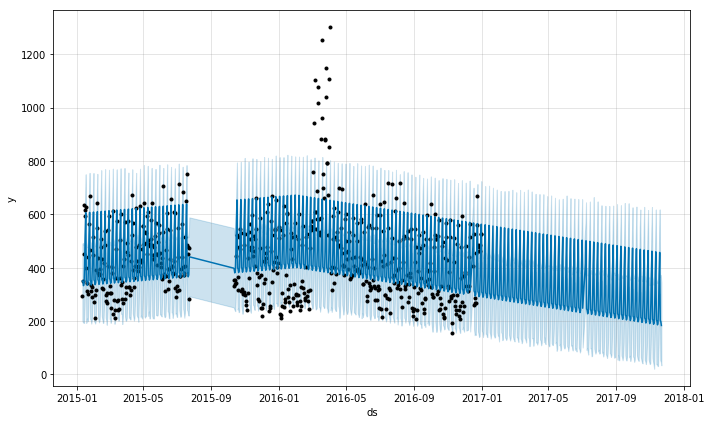

In [65]:
model.plot(forecast)

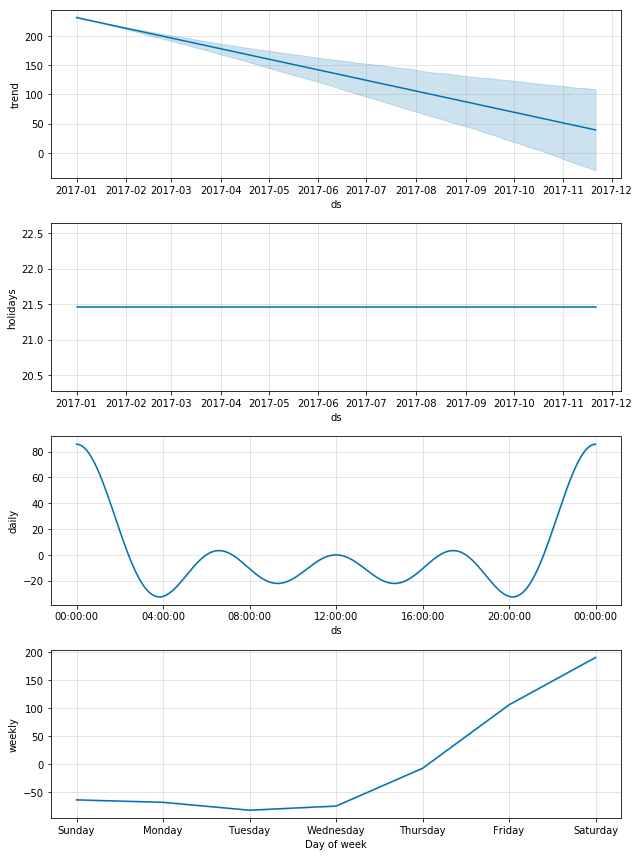

In [39]:
model.plot_components(forecast)

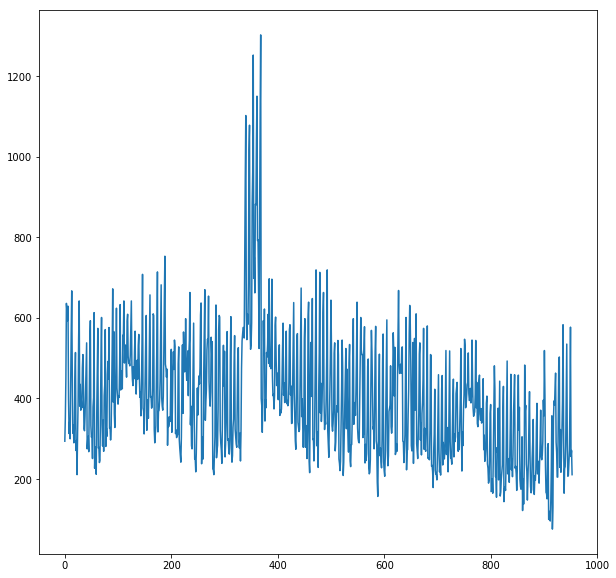

In [55]:
plt.figure(figsize=(10,10))
plt.plot(prophet_input.values[:,1])
plt.show()